<a href="https://colab.research.google.com/github/Petrakof/prog/blob/main/%D0%9A%D0%BE%D0%B4%20%D1%81%20%D0%B1%D0%B0%D0%BD%D0%B4%D1%8B%20%D0%B4%D0%BB%D1%8F%20%D0%B4%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Блокнот для обучения модели распознавания опасных предметов в багаже с помощью рентген аппарата"


In [1]:
!pip install tensorflow

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

## Загружаем данные

In [3]:
!wget https://www.dropbox.com/s/v15jsb6775ucg85/train.zip?dl=0 -O train.zip

--2024-04-06 12:37:32--  https://www.dropbox.com/s/v15jsb6775ucg85/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/v15jsb6775ucg85/train.zip [following]
--2024-04-06 12:37:32--  https://www.dropbox.com/s/raw/v15jsb6775ucg85/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc63e084abc6113626447ff09335.dl.dropboxusercontent.com/cd/0/inline/CQhAyIIEe_VIjHeLQTp-DQ8QqJwEeesYefYxsaZaKJeB4Ii6naQd2O5dws9ZnRdYQ5-bB9LxGxkIqBso9KElVsm4CIWdSe_xzPH7hSSvQMM6nudP7KZQgA-9LBc2FQWQUxe_1gv_BRRCKEpwuQY1a_Q_/file# [following]
--2024-04-06 12:37:33--  https://uc63e084abc6113626447ff09335.dl.dropboxusercontent.com/cd/0/inline/CQhAyIIEe_VIjHeLQTp-DQ8QqJwEeesYefYxsaZaKJeB4Ii6naQd2O5dws9ZnRdYQ5-bB9LxGxkIqBso9KElVsm4CIWdSe_xzPH7hSSvQM

In [4]:
!wget https://www.dropbox.com/s/ec60xlhpvz3mthi/test.zip?dl=0 -O test.zip

--2024-04-06 12:37:41--  https://www.dropbox.com/s/ec60xlhpvz3mthi/test.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ec60xlhpvz3mthi/test.zip [following]
--2024-04-06 12:37:41--  https://www.dropbox.com/s/raw/ec60xlhpvz3mthi/test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc31e47f5b8fc08dbd6f2fb031be.dl.dropboxusercontent.com/cd/0/inline/CQjT2Wbnpz76haBh7d_wvYBmlOSXufISnZW5R6LO69fe0CxjBI_6rVH92826EboIiP7xpo12L4g8p99cb3BPzLIp1tS66cURXMyeAqwCxpR1eB8P8EBhSjO1Z3kPVPV1xUzqE4KbJaagColO-Y29vAXS/file# [following]
--2024-04-06 12:37:42--  https://uc31e47f5b8fc08dbd6f2fb031be.dl.dropboxusercontent.com/cd/0/inline/CQjT2Wbnpz76haBh7d_wvYBmlOSXufISnZW5R6LO69fe0CxjBI_6rVH92826EboIiP7xpo12L4g8p99cb3BPzLIp1tS66cURXMyeAqwCxpR1e

In [5]:
!ls

sample_data  test.zip  train.zip


In [6]:
!unzip -q train.zip

In [7]:
!ls train

bags  guns


In [8]:
!unzip -q test.zip

test/guns/xray_17926 — копия.png:  mismatching "local" filename (test/guns/xray_17926 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17927 — копия.png:  mismatching "local" filename (test/guns/xray_17927 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17928 — копия.png:  mismatching "local" filename (test/guns/xray_17928 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17929 — копия.png:  mismatching "local" filename (test/guns/xray_17929 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17941 — копия.png:  mismatching "local" filename (test/guns/xray_17941 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17942 — копия.png:  mismatching "local" filename (test/guns/xray_17942 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17945 — копия.png:  mismatching

In [20]:
!ls test

bags  guns


Смотрим примеры картинок

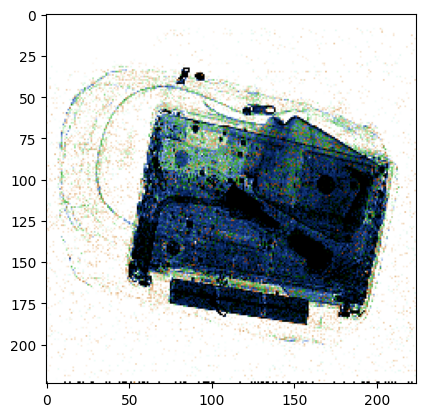

In [19]:
img_path = 'train/bags/xray_00091.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

## Создаем наборы данных

Набор данных для обучения

In [21]:
train_dataset = image_dataset_from_directory('train',
                                             batch_size=128,
                                             image_size=(224, 224))

Found 860 files belonging to 2 classes.


In [22]:
class_names = train_dataset.class_names

In [23]:
class_names

['bags', 'guns']

Набор данных для тестирования

In [24]:
test_dataset = image_dataset_from_directory('test',
                                             batch_size=128,
                                             image_size=(224, 224))

Found 310 files belonging to 2 classes.


## Создаем составную нейронную сеть

In [25]:
img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [26]:
inputs = layers.Input(shape=(224, 224, 3))
x = img_augmentation(inputs)
model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
# Для задачи с двумя классами изображений
outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)
# Для задачи с несколькими классами изображений
# num_classes = 3 # Задаем количество классов
# outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
model = tf.keras.Model(inputs, outputs, name="EfficientNet")

16705208/16705208 [==============================] - 0s 0us/step


Компилируем составную нейронную сеть

In [27]:
# Для задачи с двумя классами изображений
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Для задачи с несколькими классами изображений
# model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

## Обучаем сеть

In [28]:
history = model.fit(train_dataset,
                    epochs=10)

Epoch 1/10
7/7 [==============================] - 18s 268ms/step - loss: 0.8200 - accuracy: 0.5465
Epoch 2/10
7/7 [==============================] - 4s 248ms/step - loss: 0.5632 - accuracy: 0.7221
Epoch 3/10
7/7 [==============================] - 5s 233ms/step - loss: 0.4705 - accuracy: 0.7756
Epoch 4/10
7/7 [==============================] - 4s 236ms/step - loss: 0.4067 - accuracy: 0.8093
Epoch 5/10
7/7 [==============================] - 5s 242ms/step - loss: 0.3399 - accuracy: 0.8593
Epoch 6/10
7/7 [==============================] - 5s 241ms/step - loss: 0.3490 - accuracy: 0.8581
Epoch 7/10
7/7 [==============================] - 4s 238ms/step - loss: 0.3214 - accuracy: 0.8628
Epoch 8/10
7/7 [==============================] - 5s 245ms/step - loss: 0.3061 - accuracy: 0.8628
Epoch 9/10
7/7 [==============================] - 4s 243ms/step - loss: 0.3109 - accuracy: 0.8686
Epoch 10/10
7/7 [==============================] - 5s 261ms/step - loss: 0.2959 - accuracy: 0.8686


Проверяем качество обучения на тестовом наборе данных


In [29]:
scores = model.evaluate(test_dataset, verbose=1)

3/3 [==============================] - 8s 1s/step - loss: 0.4710 - accuracy: 0.7903


In [30]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 79.0323


## Использование нейронной сети для распознавания изображений

Вспоминаем номера классов

In [31]:
class_names

['bags', 'guns']

Загружаем изображение из файла

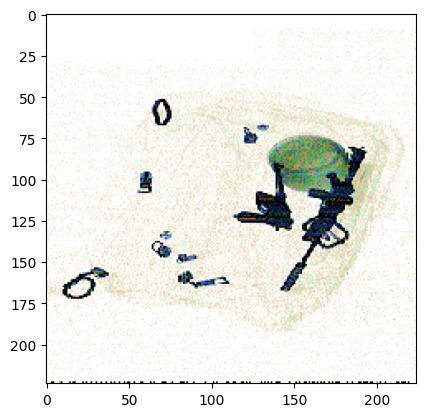

In [32]:
img_path = 'test/guns/xray_15488.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

Преобразуем изображение в массив

In [33]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

Запускаем распознавание

In [34]:
prediction = model.predict(x)

1/1 [==============================] - 2s 2s/step


Печатаем результаты распознавания

In [35]:
prediction

array([[0.9191362]], dtype=float32)